# **TASK1**
**Problem Statement: To find if the idea of hosts not being very responsive is reasonable to expand business in Amsterdam.**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

**Reading data from listings_Amsterdam.csv (Please do upload the file to google colab)**

Dropped the columns ('neighbourhood_group_cleansed','bathrooms','scrape_id','calendar_updated') as they are completely null in the csv file 

In [ ]:
df = pd.read_csv("listings_Amsterdam.csv")
listings_df = df.copy()
listings_df.head()

**General Data Insights**

In [ ]:
listings_df.info()

In [ ]:
listings_df.shape

In [ ]:
listings_df.host_response_time.unique()

In [ ]:
# Calculating percentage of null values in each column
for column in listings_df.columns:
  print(f"{column}: {round(listings_df[column].isnull().sum()/len(listings_df[column]), 2)}")

In [ ]:
listings_df.info()

**Bar Chart**

In [6]:
count = listings_df.host_response_time.value_counts()

Text(0.5, 1.0, 'Count of host_response_time')

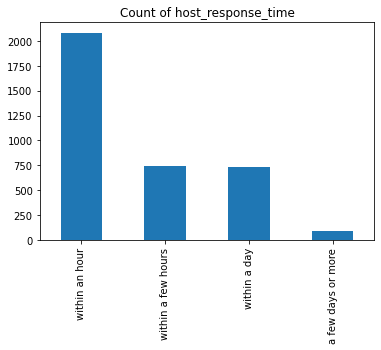

In [7]:
pie = count.plot(kind='bar')
pie.set_title("Count of host_response_time")

**Heat Map**

In [ ]:
heatmap_df = listings_df[['property_type','host_location','host_listings_count','host_acceptance_rate','host_response_rate','review_scores_rating','host_is_superhost','instant_bookable','host_response_time']]

heatmap_df['property_type']=heatmap_df['property_type'].astype('category').cat.codes
heatmap_df['host_location']=heatmap_df['host_location'].astype('category').cat.codes
heatmap_df['host_response_time']=heatmap_df['host_response_time'].astype('category').cat.codes
heatmap_df['host_acceptance_rate']=heatmap_df['host_acceptance_rate'].astype('category').cat.codes
heatmap_df['host_response_rate']=heatmap_df['host_response_rate'].astype('category').cat.codes
heatmap_df['host_is_superhost']=heatmap_df['host_is_superhost'].astype('category').cat.codes
heatmap_df['instant_bookable']=heatmap_df['instant_bookable'].astype('category').cat.codes

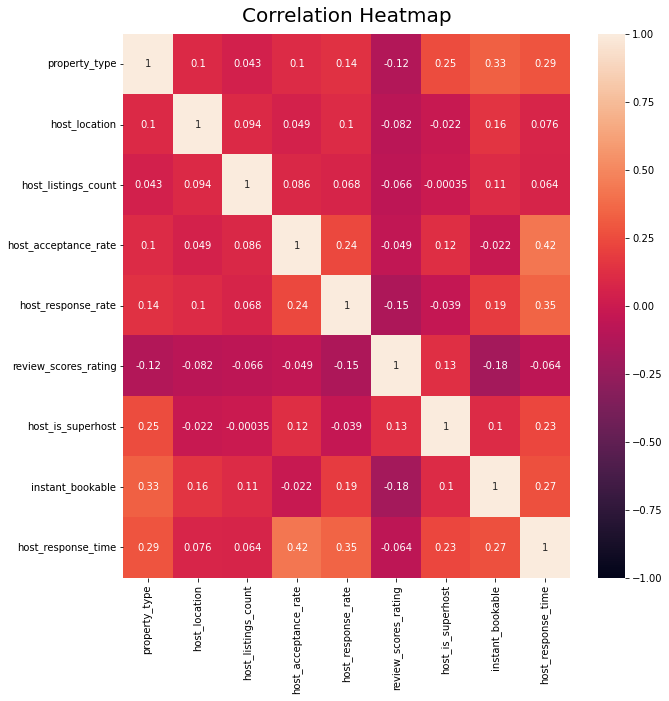

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(heatmap_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

**Linear Regression to find the p-value that supports the hypothesis and also to find the relationship/correlation between the features and the target**

In [ ]:
x = heatmap_df[['property_type','host_location','host_listings_count','host_response_rate','host_acceptance_rate','host_is_superhost','instant_bookable']]
y = heatmap_df['host_response_time']
 
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x) 
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.21128742371116793
Coefficients: 
 [ 1.88327114e-02  1.05540626e-05 -6.38400142e-04  3.00468143e-02
  1.75369448e-02  5.87995253e-01  6.68569654e-01]
                            OLS Regression Results                            
Dep. Variable:     host_response_time   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     409.2
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:03:45   Log-Likelihood:                -9772.2
No. Observations:                5556   AIC:                         1.956e+04
Df Residuals:                    5548   BIC:                         1.961e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Wider range of columns from the dataset are used to see the correlation**

In [ ]:
correlationheatmap_df = listings_df[['host_since','host_location','host_response_rate','host_acceptance_rate','host_is_superhost','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds','amenities','price','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','host_response_time']]

correlationheatmap_df['property_type']=correlationheatmap_df['property_type'].astype('category').cat.codes
correlationheatmap_df['host_location']=correlationheatmap_df['host_location'].astype('category').cat.codes
correlationheatmap_df['host_response_time']=correlationheatmap_df['host_response_time'].astype('category').cat.codes
correlationheatmap_df['host_acceptance_rate']=correlationheatmap_df['host_acceptance_rate'].astype('category').cat.codes
correlationheatmap_df['host_response_rate']=correlationheatmap_df['host_response_rate'].astype('category').cat.codes
correlationheatmap_df['host_is_superhost']=correlationheatmap_df['host_is_superhost'].astype('category').cat.codes
correlationheatmap_df['instant_bookable']=correlationheatmap_df['instant_bookable'].astype('category').cat.codes
correlationheatmap_df['host_since']=correlationheatmap_df['host_since'].astype('category').cat.codes
correlationheatmap_df['host_neighbourhood']=correlationheatmap_df['host_neighbourhood'].astype('category').cat.codes
correlationheatmap_df['host_verifications']=correlationheatmap_df['host_verifications'].astype('category').cat.codes
correlationheatmap_df['host_has_profile_pic']=correlationheatmap_df['host_has_profile_pic'].astype('category').cat.codes
correlationheatmap_df['host_identity_verified']=correlationheatmap_df['host_identity_verified'].astype('category').cat.codes
correlationheatmap_df['neighbourhood']=correlationheatmap_df['neighbourhood'].astype('category').cat.codes
correlationheatmap_df['neighbourhood_cleansed']=correlationheatmap_df['neighbourhood_cleansed'].astype('category').cat.codes
correlationheatmap_df['latitude']=correlationheatmap_df['latitude'].astype('category').cat.codes
correlationheatmap_df['longitude']=correlationheatmap_df['longitude'].astype('category').cat.codes
correlationheatmap_df['room_type']=correlationheatmap_df['room_type'].astype('category').cat.codes
correlationheatmap_df['amenities']=correlationheatmap_df['amenities'].astype('category').cat.codes
correlationheatmap_df['price']=correlationheatmap_df['price'].astype('category').cat.codes

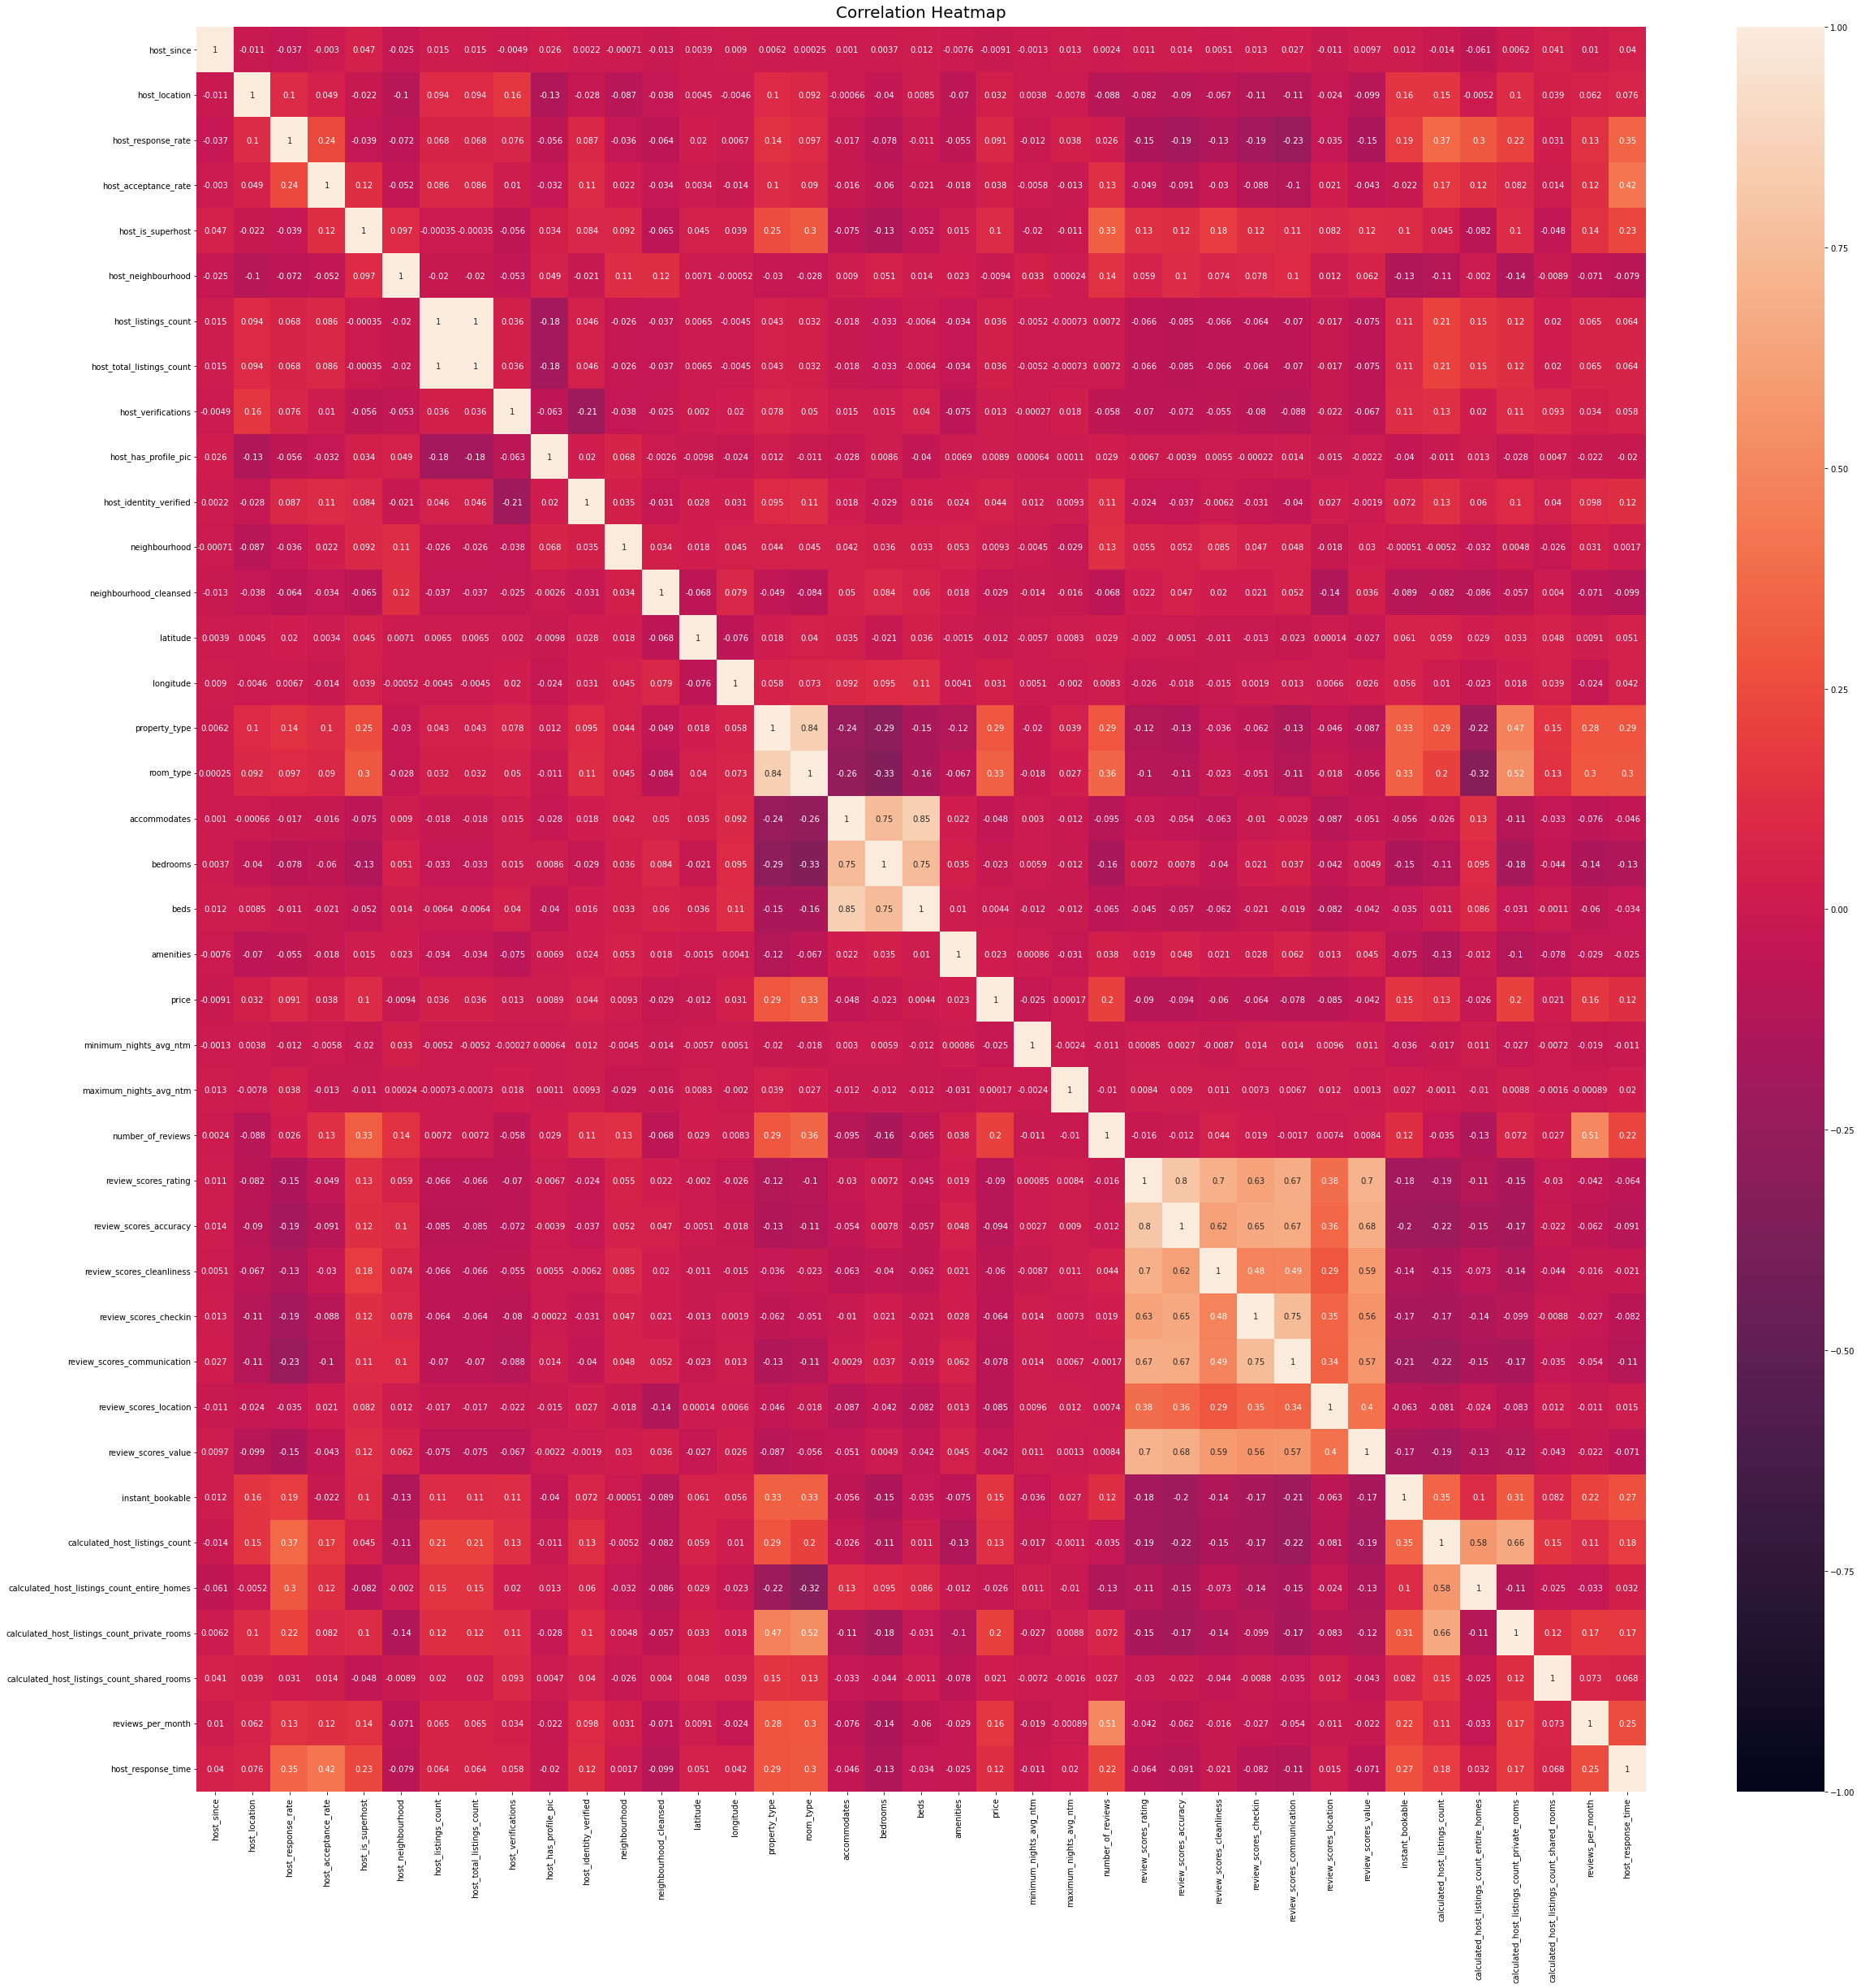

In [11]:
plt.figure(figsize=(40, 40))
heatmap = sns.heatmap(correlationheatmap_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [ ]:
correlationheatmap_df.fillna(correlationheatmap_df.mean(), inplace=True)

**More factors are considered here to see if the R Square value increases**

In [15]:
x = correlationheatmap_df[['host_since','host_location','host_response_rate','host_acceptance_rate','host_is_superhost','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bedrooms','beds','amenities','price','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month']]
y = correlationheatmap_df['host_response_time']
 
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x) 
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -1.4789944144306433
Coefficients: 
 [ 8.95311549e-05 -3.11979843e-04  3.29638895e-02  1.72133434e-02
  4.81873040e-01 -3.43658209e-03  4.80761547e-04  4.80761549e-04
  1.00121568e-03  3.92921127e-01  1.03234586e-01 -3.02968950e-03
 -9.53473357e-03  3.99906857e-05  3.54118275e-05  2.45284449e-03
  2.28757898e-01  5.22509622e-02 -3.94672380e-02 -3.37379295e-03
  1.61838534e-05  5.46925739e-05  5.11216975e-04  2.64574526e-10
  5.23470119e-04  2.07066904e-02  1.41345024e-01  1.31944703e-01
  7.16977040e-03  1.20535422e-02  8.17009352e-02 -2.50808397e-01
  6.28562037e-01  1.24425908e-02 -6.13254961e-02 -7.15681392e-02
  1.87850887e-01  5.05476293e-02]
                            OLS Regression Results                            
Dep. Variable:     host_response_time   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     86.97
Date:           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# **TASK2**
**Problem Statement: To find out if all the hosts are verified by the government and see if the guests pose any danger?**

Please refer to Power BI, Host_Identity_Verification sheet.


# **TASK3**
**Problem Statement: Are there any insights that you can share regarding the
property types and sizes - for instance, should we focus on some specific neighbourhoods first?**

Please refer to Power BI, Neighborhoods_to_Focus sheet.

# **TASK4**

**Problem Statement: How are the properties in Amsterdam performing,
which review scores do they have? How do they perform on the cleanliness dimension?**

Please refer to Power BI, Properties_Performance sheet.